### Importing dependencies and loading Covid-19 dataset

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

# Path of the file to read.
data_path = "countries-aggregated_csv.csv"
data = pd.read_csv(data_path )

## Data exploration

In [135]:
# Checks if there is any missing data on the dataset
data.isna().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [136]:
# Checks the types of the data in the columns
data.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [137]:
# Shows how many rows and columns are in the dataset, and if there is any missing data, and the type of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143668 entries, 0 to 143667
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       143668 non-null  object
 1   Country    143668 non-null  object
 2   Confirmed  143668 non-null  int64 
 3   Recovered  143668 non-null  int64 
 4   Deaths     143668 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 5.5+ MB


In [138]:
data.describe()

,Confirmed,Recovered,Deaths
count,1.436680e+05,1.436680e+05,143668.000000
mean,5.712247e+05,1.635121e+05,12306.660189
std,2.838398e+06,1.032340e+06,52910.346456
min,0.000000e+00,0.000000e+00,0.000000
25%,9.100000e+02,0.000000e+00,13.000000
50%,1.749300e+04,7.240000e+02,289.000000
75%,2.060302e+05,2.687300e+04,3647.000000
max,7.069942e+07,3.097475e+07,866540.000000


### Plotting the histograms of the countries with different features.

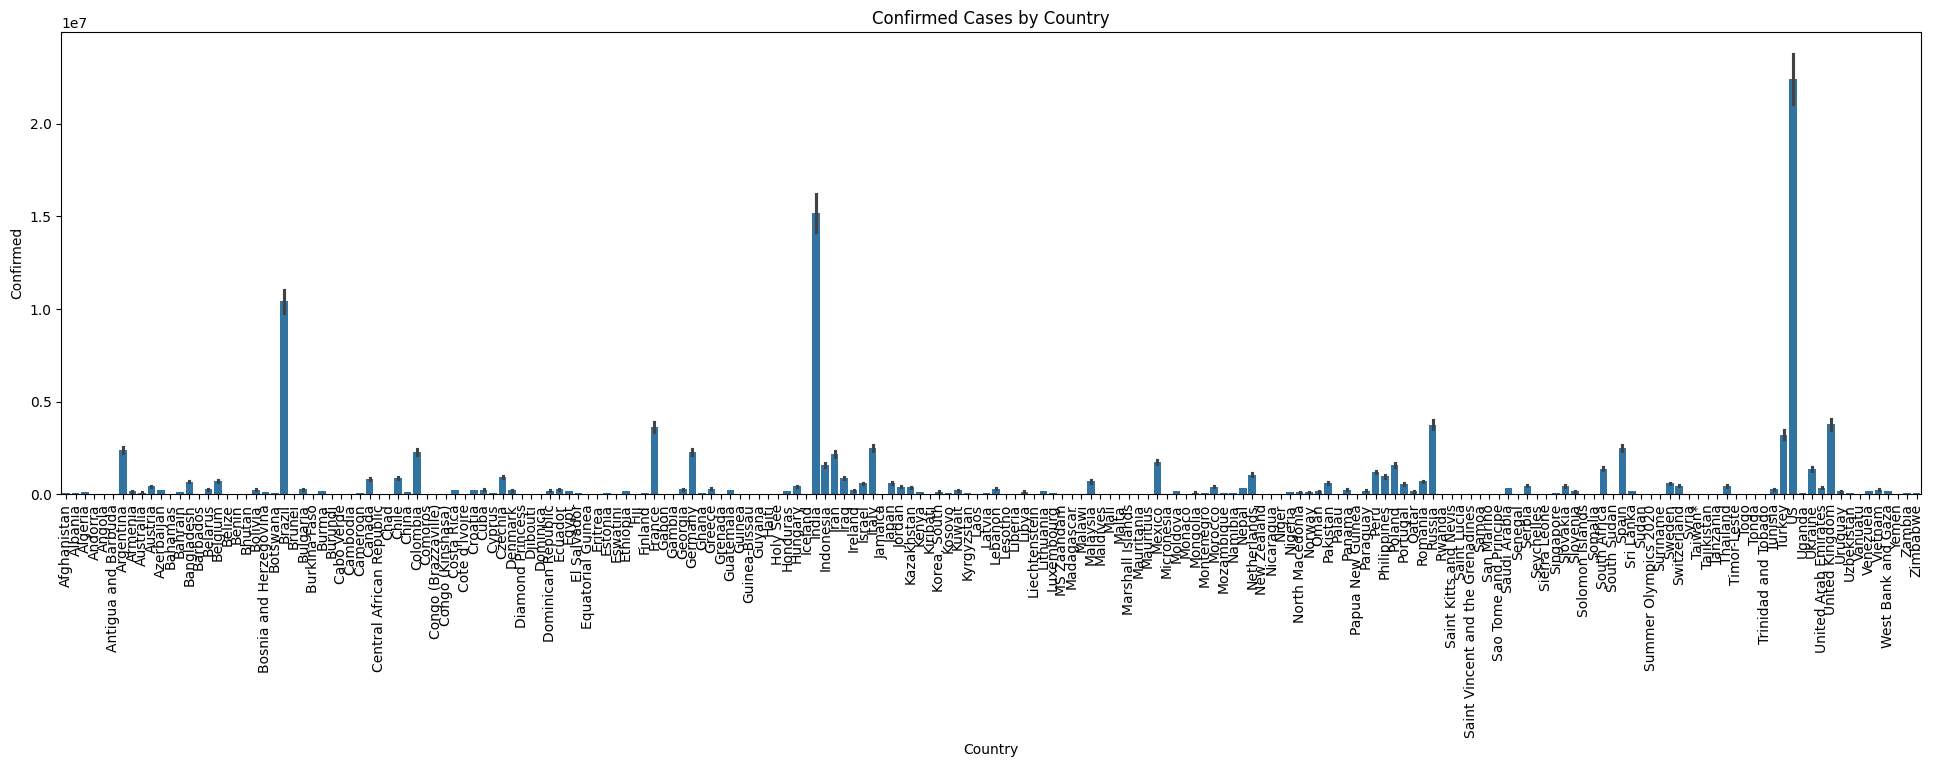

In [139]:
# Confirmed
plt.figure(figsize=(24, 6))
sns.barplot(x='Country', y='Confirmed', data=data)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Confirmed')
plt.title('Confirmed Cases by Country')
plt.show()

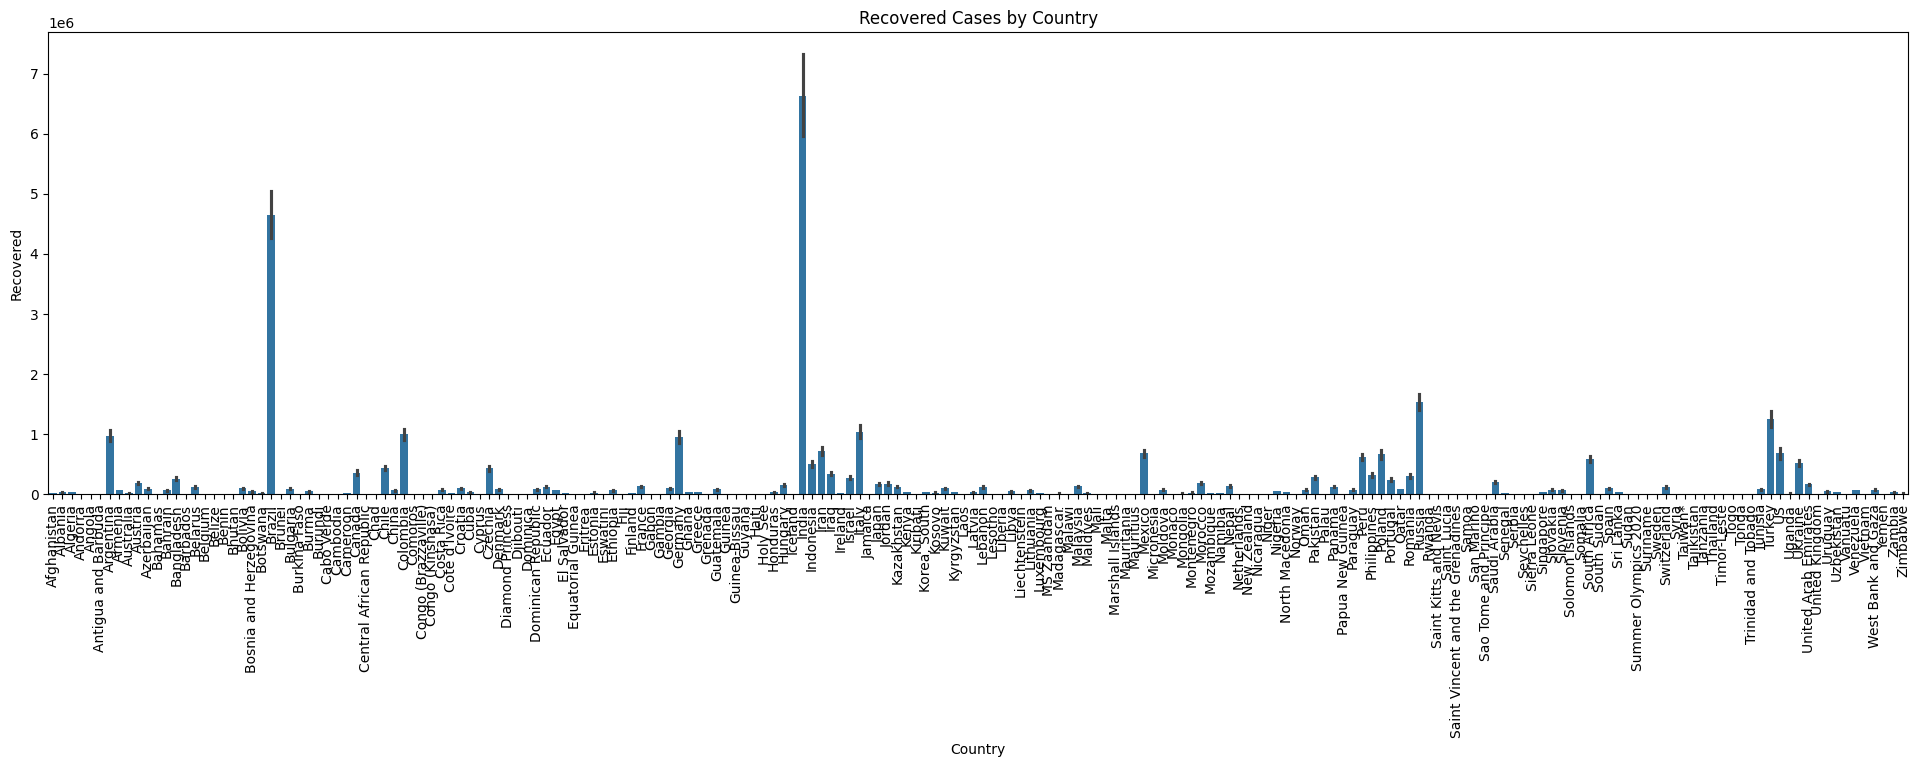

In [140]:
# Recovered
plt.figure(figsize=(24, 6))
sns.barplot(x='Country', y='Recovered', data=data)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Recovered')
plt.title('Recovered Cases by Country')
plt.show()

Brazil, India and US had high amount of confirmed cases, but US had the lowest recovery compared to the other countries by far

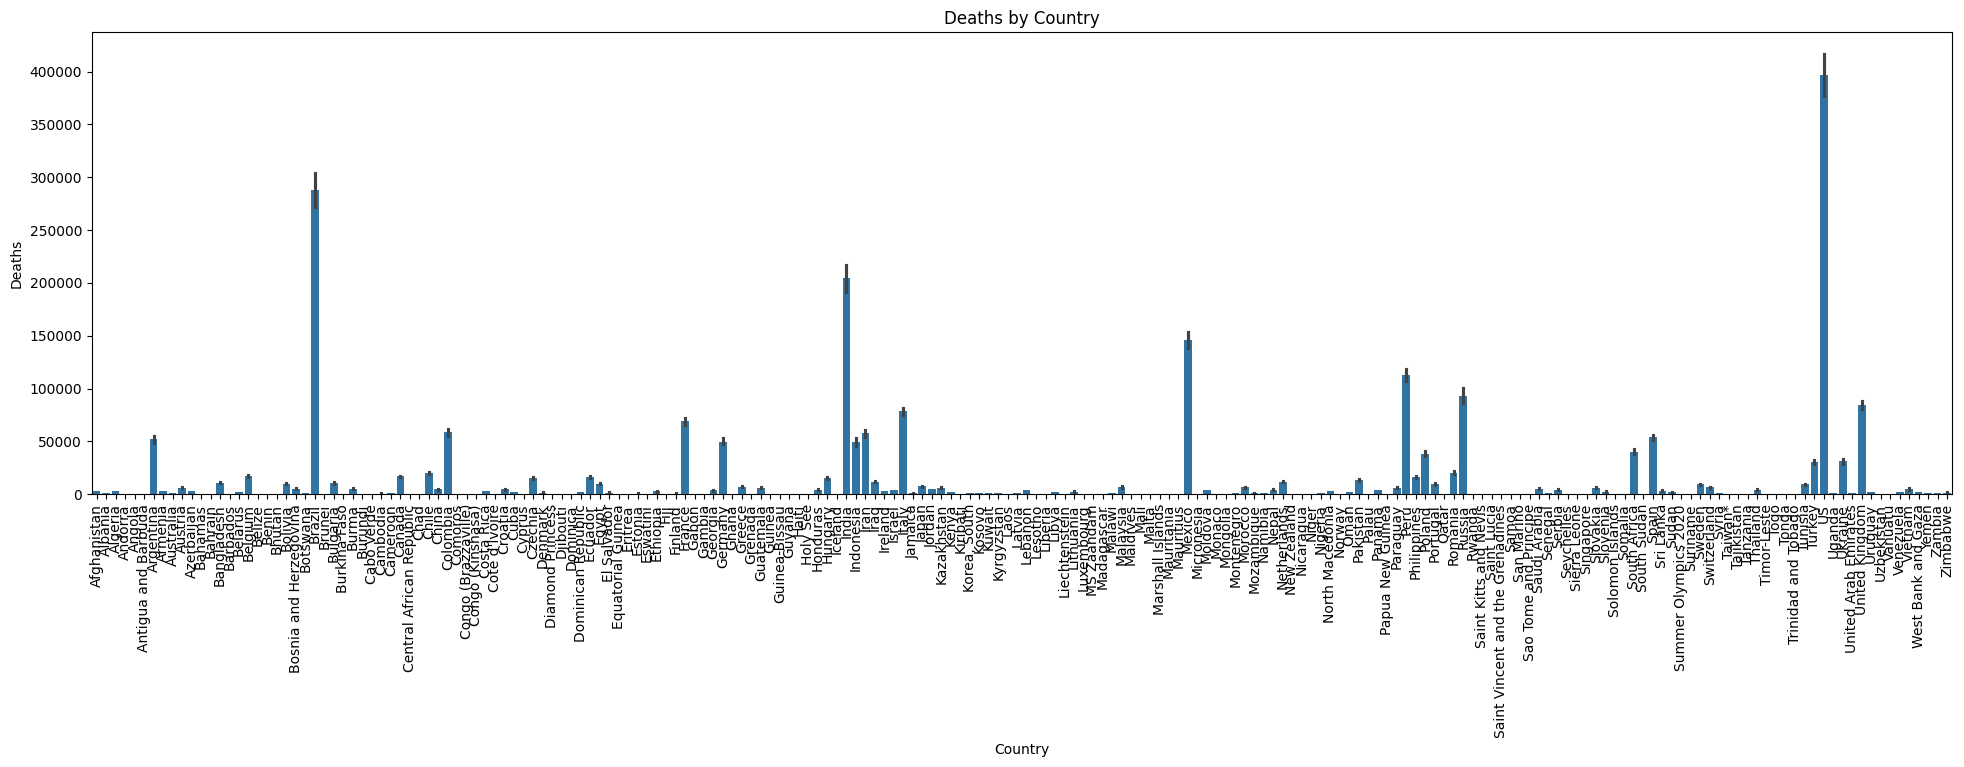

In [141]:
# Deaths
plt.figure(figsize=(24, 6))
sns.barplot(x='Country', y='Deaths', data=data)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Deaths')
plt.title('Deaths by Country')
plt.show()

Even though Brazil and India had a lot of recovery cases, they still had a lot of deaths. Mexico, Peru, Russia and UK also had a lot of deaths

### Exploring what information can be found about Finland

In [142]:
# Adding year column to the dataset, so that we can analyze the data by year
data["Year"] = pd.to_datetime(data["Date"]).dt.year

In [143]:
# Shows the first 5 rows of the dataset
data.head()

,Date,Country,Confirmed,Recovered,Deaths,Year
0,1/22/2020,Afghanistan,0,0,0,2020
1,1/23/2020,Afghanistan,0,0,0,2020
2,1/24/2020,Afghanistan,0,0,0,2020
3,1/25/2020,Afghanistan,0,0,0,2020
4,1/26/2020,Afghanistan,0,0,0,2020


In [144]:
# Checking if Finland is in the dataset
finland = data[data["Country"] == "Finland"]
finland.head()

,Date,Country,Confirmed,Recovered,Deaths,Year
44713,1/22/2020,Finland,0,0,0,2020
44714,1/23/2020,Finland,0,0,0,2020
44715,1/24/2020,Finland,0,0,0,2020
44716,1/25/2020,Finland,0,0,0,2020
44717,1/26/2020,Finland,0,0,0,2020


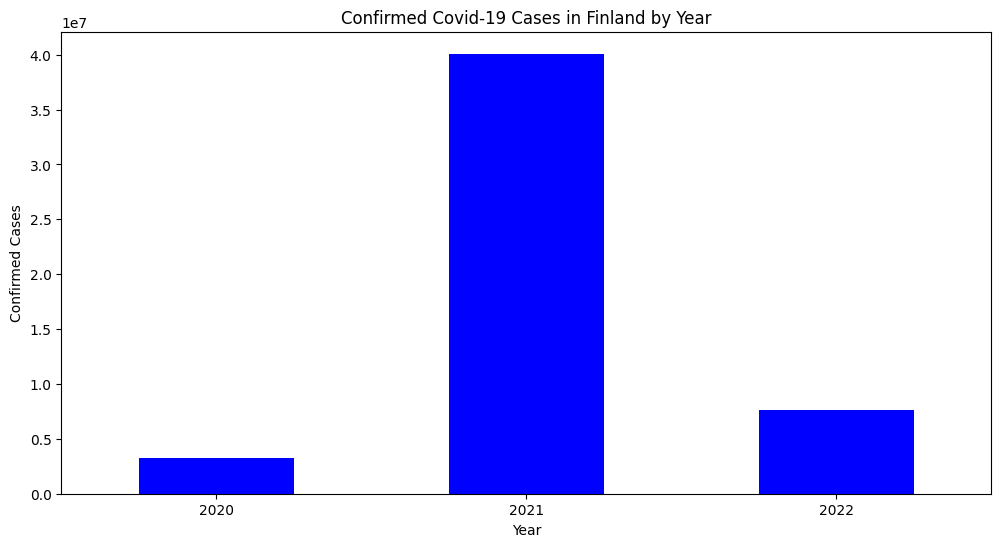

Total number of confirmed Covid-19 cases in Finland in 2020: 3222027
Total number of confirmed Covid-19 cases in Finland in 2021: 40085121
Total number of confirmed Covid-19 cases in Finland in 2022: 7670184


In [145]:
# Confirmed cases in Finland by year dataframe
confirmed_cases_finland_by_year = data[(data['Country'] == 'Finland')].groupby("Year")["Confirmed"].sum()

# Plotting the confirmed cases in Finland by year
plt.figure(figsize=(12, 6))
confirmed_cases_finland_by_year.plot(kind='bar', color='blue')
plt.xlabel('Year')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed Covid-19 Cases in Finland by Year')
plt.xticks(rotation=0)
plt.show()

# Looping through the confirmed cases in Finland by year dataframe
for year, confirmed_cases in confirmed_cases_finland_by_year.items():
    print(f"Total number of confirmed Covid-19 cases in Finland in {year}: {confirmed_cases}")

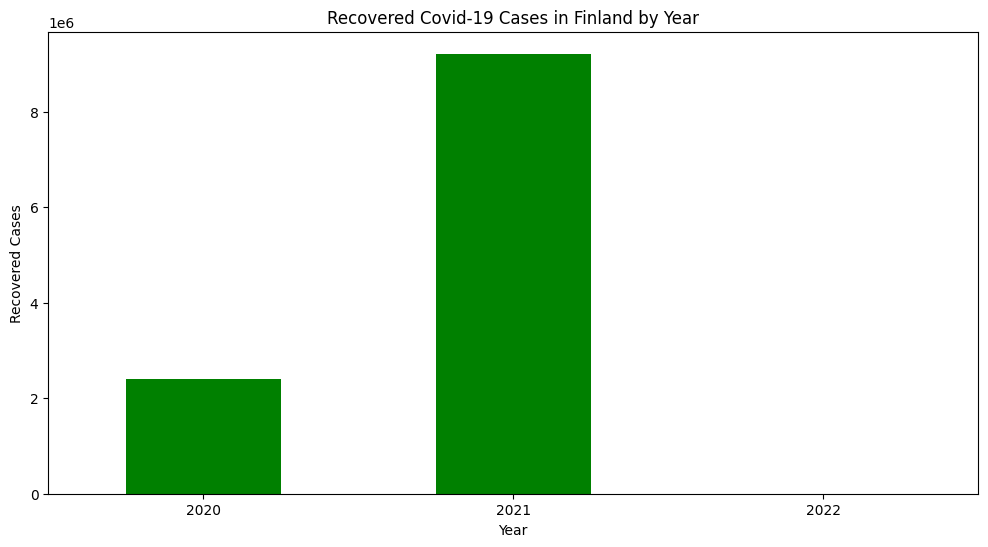

Total number of recovered Covid-19 cases in Finland in 2020: 2412672
Total number of recovered Covid-19 cases in Finland in 2021: 9217000
Total number of recovered Covid-19 cases in Finland in 2022: 0


In [146]:
# Recovered cases in Finland by year
recovered_cases_finland_by_year = data[(data['Country'] == 'Finland')].groupby("Year")["Recovered"].sum()

# Plotting the recovered cases in Finland by year
plt.figure(figsize=(12, 6))
recovered_cases_finland_by_year.plot(kind='bar', color='green')
plt.xlabel('Year')
plt.ylabel('Recovered Cases')
plt.title('Recovered Covid-19 Cases in Finland by Year')
plt.xticks(rotation=0)
plt.show()

# Looping through the recovered cases in Finland by year dataframe
for year, recovered_cases in recovered_cases_finland_by_year.items():
    print(f"Total number of recovered Covid-19 cases in Finland in {year}: {recovered_cases}")


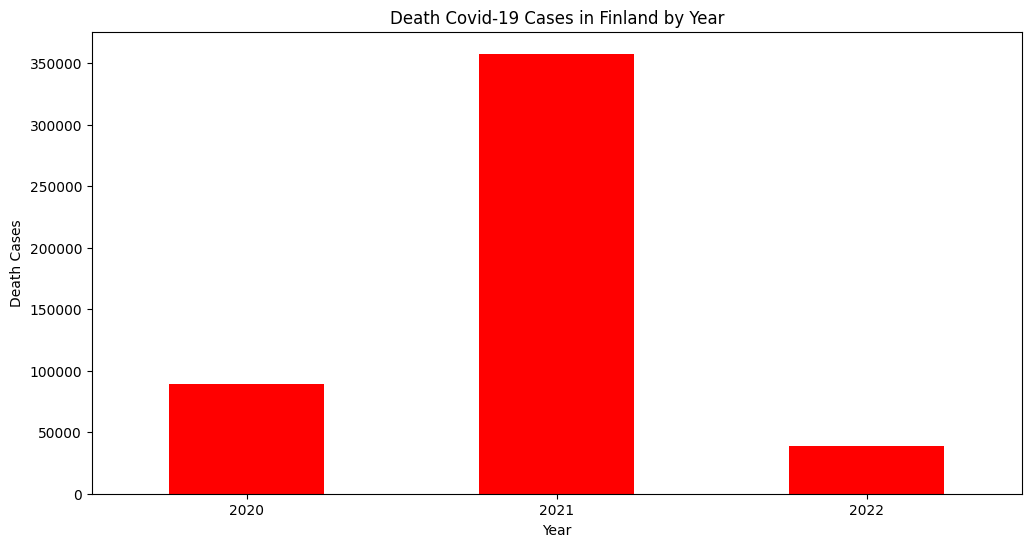

Total number of death Covid-19 cases in Finland in 2020: 88920
Total number of death Covid-19 cases in Finland in 2021: 357671
Total number of death Covid-19 cases in Finland in 2022: 38439


In [147]:
# Death cases in Finland by year
death_cases_finland_by_year = data[(data['Country'] == 'Finland')].groupby("Year")["Deaths"].sum()

# Plotting the death cases in Finland by year
plt.figure(figsize=(12, 6))
death_cases_finland_by_year.plot(kind='bar', color='red')
plt.xlabel('Year')
plt.ylabel('Death Cases')
plt.title('Death Covid-19 Cases in Finland by Year')
plt.xticks(rotation=0)
plt.show()

# Looping through the death cases in Finland by year dataframe
for year, death_cases in death_cases_finland_by_year.items():
    print(f"Total number of death Covid-19 cases in Finland in {year}: {death_cases}")

Plotting the number of cases in Finland between 2020-2022

C:\Users\sami_\AppData\Local\Temp\ipykernel_13908\1773207243.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finland["Date"] = pd.to_datetime(df_finland["Date"])


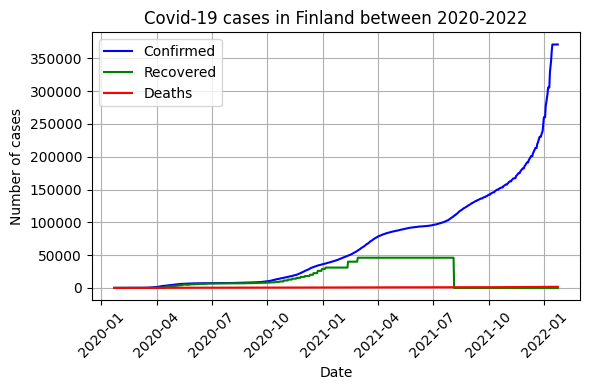

In [148]:
# Making Finland dataframe to show the number of confirmed, recovered and death cases in Finland
df_finland = data[data["Country"] == "Finland"]

# Changing the date column to datetime format
df_finland["Date"] = pd.to_datetime(df_finland["Date"])

# Plotting lineplots of confirmed, recovered and death cases in Finland
plt.figure(figsize=(6,4))
sns.lineplot(x="Date", y="Confirmed", data=df_finland, color="blue", label="Confirmed")
sns.lineplot(x="Date", y="Recovered", data=df_finland, color="green", label="Recovered")
sns.lineplot(x="Date", y="Deaths", data=df_finland, color="red", label="Deaths")
plt.xlabel("Date")
plt.ylabel("Number of cases")
plt.title("Covid-19 cases in Finland between 2020-2022")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

Plotting pie chart to visualize total sizes of each group.

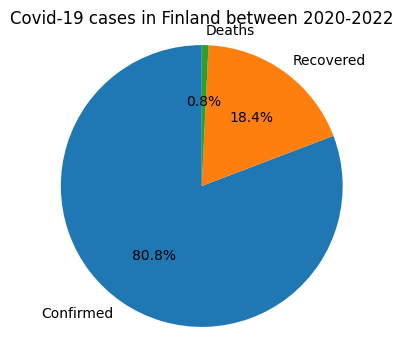

In [149]:
total_cases = df_finland[["Confirmed", "Recovered", "Deaths"]].sum()

plt.figure(figsize=(4,4))
plt.pie(total_cases.values, labels=total_cases.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Covid-19 cases in Finland between 2020-2022")
plt.show()

## Feature Engineering

In [150]:
def plot_feature(xName, yName, data):
    """
    Function plots the features from the dataset.

    xName = x-axis feature\n
    yName = y-axis feature
    """
    plt.figure(figsize=(24,6))
    sns.barplot(x=xName, y=yName, data=data)
    plt.title(f'{yName} plot')
    plt.xlabel(xName)
    plt.ylabel(yName)
    plt.xticks(rotation=90)
    plt.show()

def add_feature(data, feature1, feature2, newFeature):
    """
    Function adds a new feature, which is a ratio of two already existing features.

    data = dataset\n
    feature1 = numerator\n
    feature2 = denominator\n
    newFeature = the name of the new feature
    """
    data[newFeature] = (data[feature1] / data[feature2]) * 100
    data[newFeature] = data[newFeature].fillna(data[newFeature].mean())
    data[newFeature] = data[newFeature].replace([-np.inf, np.inf], 0)
    return data

In [170]:
# Copying the original data to a new variable
mod_data = data.copy()

mod_data = add_feature(mod_data, 'Deaths', 'Confirmed', 'Death_Ratio')
mod_data = add_feature(mod_data, 'Recovered', 'Confirmed', 'Recovery_Ratio')
mod_data = add_feature(mod_data, 'Recovered', 'Deaths', 'Recovery_Death_Ratio')

mod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143668 entries, 0 to 143667
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  143668 non-null  object 
 1   Country               143668 non-null  object 
 2   Confirmed             143668 non-null  int64  
 3   Recovered             143668 non-null  int64  
 4   Deaths                143668 non-null  int64  
 5   Year                  143668 non-null  int32  
 6   Death_Ratio           143668 non-null  float64
 7   Recovery_Ratio        143668 non-null  float64
 8   Recovery_Death_Ratio  143668 non-null  float64
dtypes: float64(3), int32(1), int64(3), object(2)
memory usage: 9.3+ MB


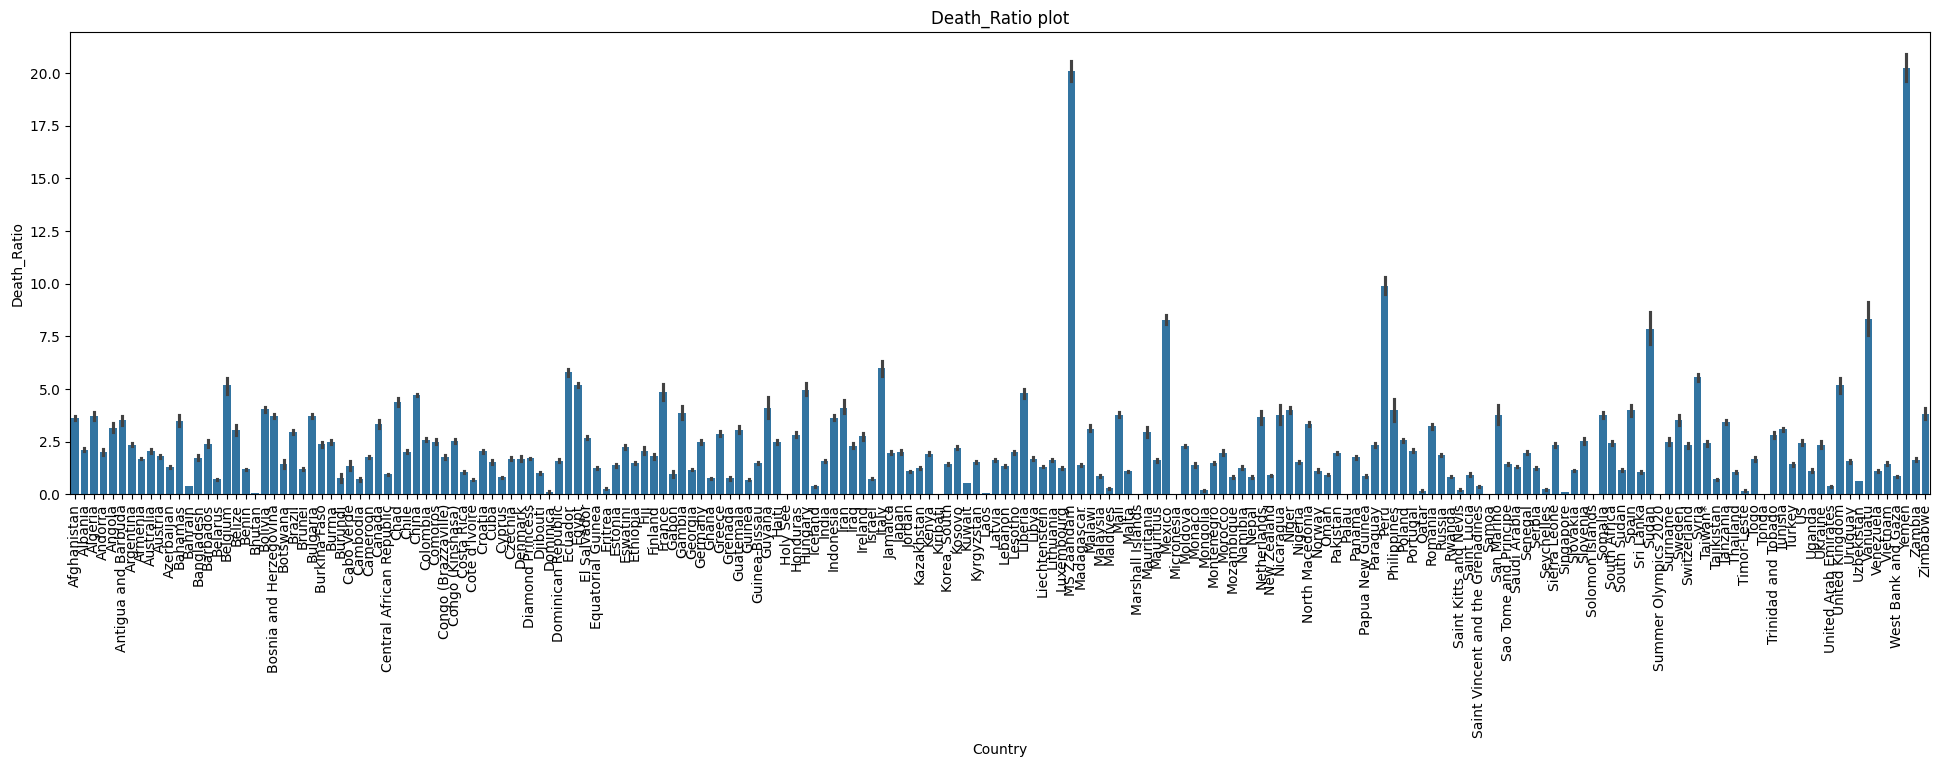

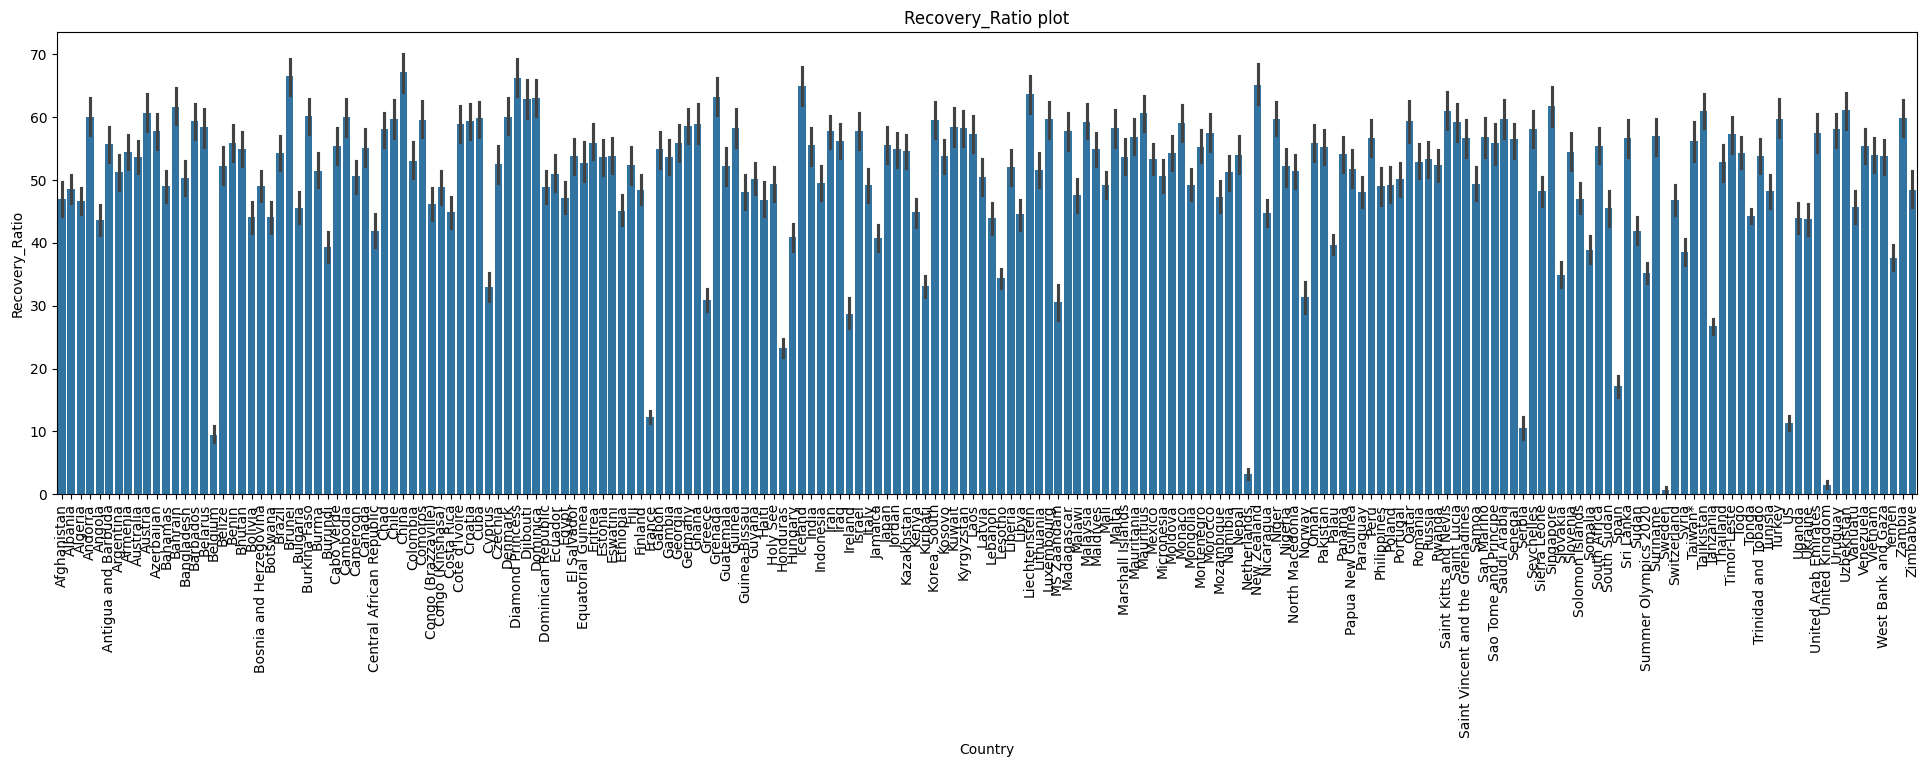

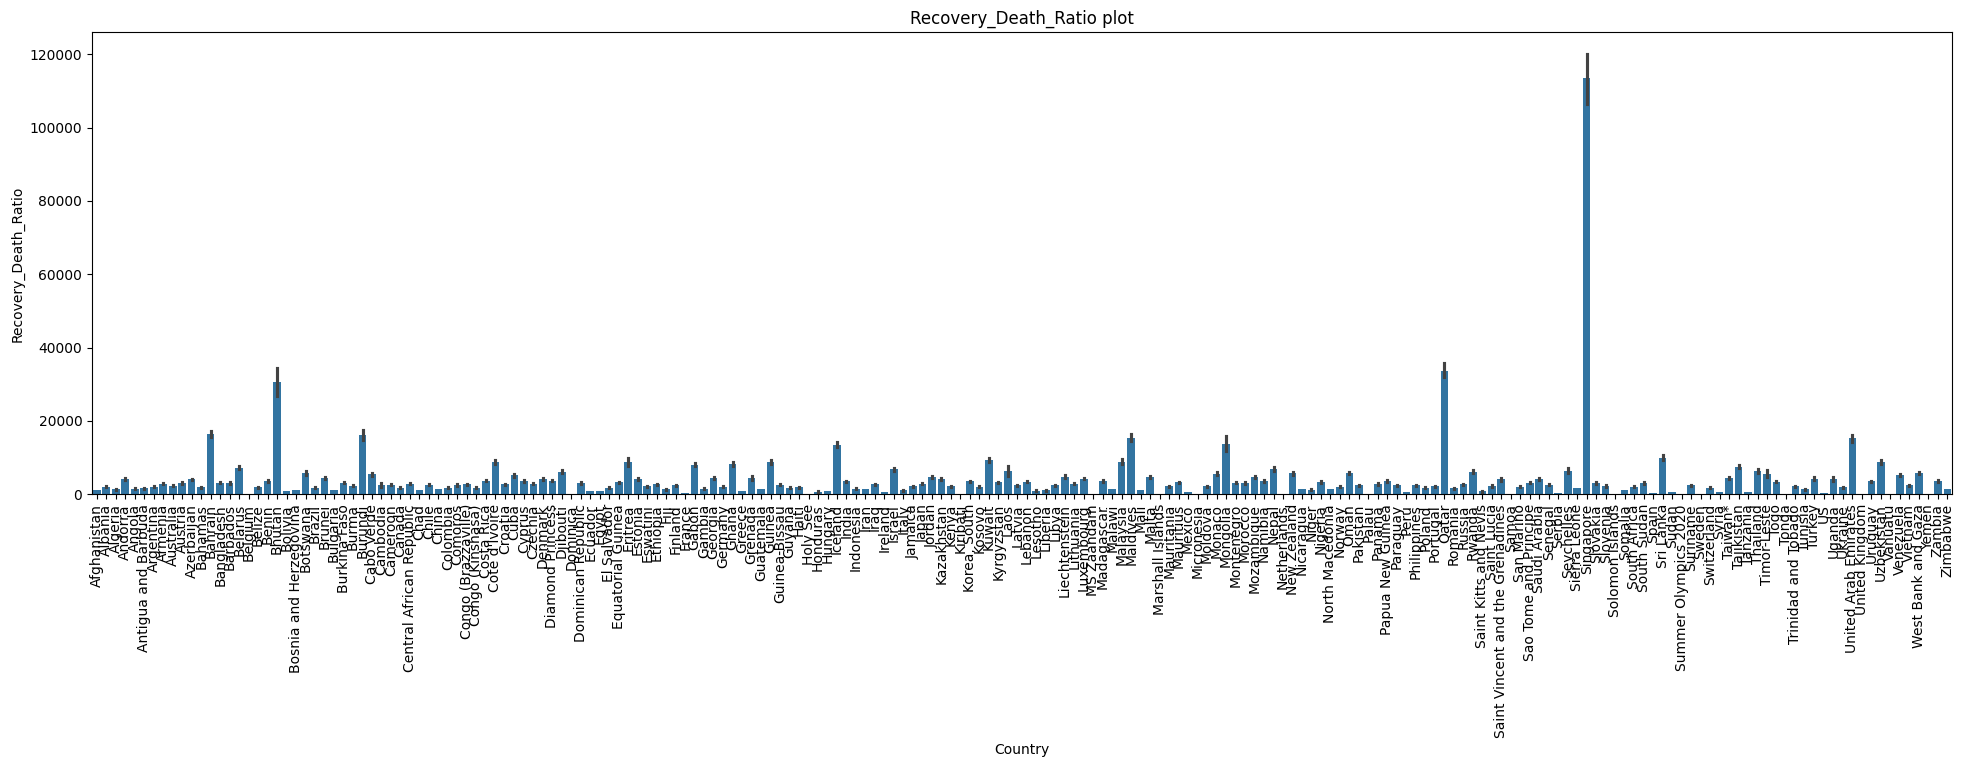

In [171]:
# Plotting the Death ratio, Recovery ratio and Recovery Death ratiohistograms in the dataset
plot_feature('Country', 'Death_Ratio', mod_data)
plot_feature('Country', 'Recovery_Ratio', mod_data)
plot_feature('Country', 'Recovery_Death_Ratio', mod_data)


We can see from the plots, that they are not completely opposites of themselves, so we might get more information from them. There seems to be some different outliers, which can help in the classification.

Same thing here. There are some different outliers which might help with the classification task. Let's try next subtracting **Deaths** from **Recovered** and normalizing with **Confirmed** and see if we can get new information.

In [157]:
mod_data['Subtraction_Ratio'] = ((mod_data['Recovered'] - mod_data['Deaths']) / mod_data['Confirmed']) * 100
mod_data['Subtraction_Ratio'] = mod_data['Subtraction_Ratio'].fillna(mod_data['Subtraction_Ratio'].mean())
mod_data['Subtraction_Ratio'] = mod_data['Subtraction_Ratio'].replace([-np.inf, np.inf], 0)
mod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143668 entries, 0 to 143667
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  143668 non-null  object 
 1   Country               143668 non-null  object 
 2   Confirmed             143668 non-null  int64  
 3   Recovered             143668 non-null  int64  
 4   Deaths                143668 non-null  int64  
 5   Year                  143668 non-null  int32  
 6   Death_Ratio           143668 non-null  float64
 7   Recovery_Ratio        143668 non-null  float64
 8   Recovery_Death_Ratio  143668 non-null  float64
 9   Subtraction_Ratio     143668 non-null  float64
dtypes: float64(4), int32(1), int64(3), object(2)
memory usage: 10.4+ MB


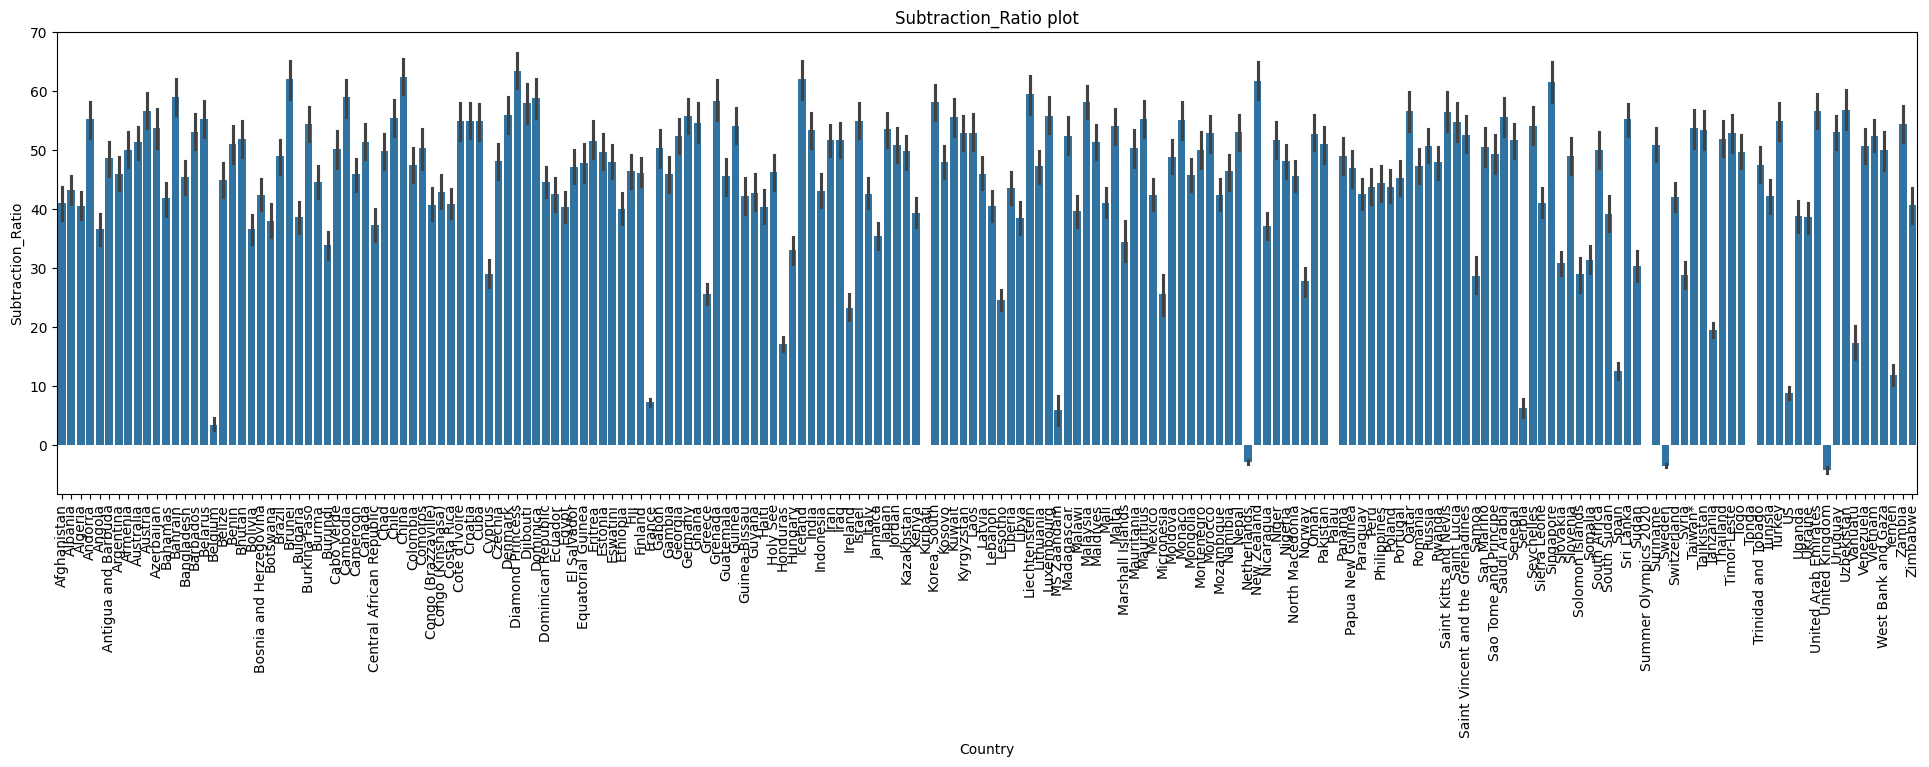

In [158]:
plot_feature('Country', 'Subtraction_Ratio', mod_data)

Seems like we get a very similar plot to the **Recovery_Ratio**, so we probably don't get any new information from **Subtraction_Ratio**. Let's see how the base features look with log function.

In [173]:
def add_log_feature(data, old_feature):
    """
    Function adds existing features as inputed in log function to the dataset and cleans +/- inf or NaN values
    from the dataset.

    data = dataset\n
    old_feature = existing feature in the dataset that is added as log feature.
    """
    data['Log_' + old_feature] = np.log(data[old_feature])
    data['Log_' + old_feature] = data['Log_' + old_feature].fillna(data['Log_' + old_feature].mean())
    data['Log_' + old_feature] = data['Log_' + old_feature].replace([-np.inf, np.inf], 0)
    return data

mod_data = add_log_feature(mod_data, 'Confirmed')
mod_data = add_log_feature(mod_data, 'Deaths')
mod_data = add_log_feature(mod_data, 'Recovered')

mod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143668 entries, 0 to 143667
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  143668 non-null  object 
 1   Country               143668 non-null  object 
 2   Confirmed             143668 non-null  int64  
 3   Recovered             143668 non-null  int64  
 4   Deaths                143668 non-null  int64  
 5   Year                  143668 non-null  int32  
 6   Death_Ratio           143668 non-null  float64
 7   Recovery_Ratio        143668 non-null  float64
 8   Recovery_Death_Ratio  143668 non-null  float64
 9   Log_Confirmed         143668 non-null  float64
 10  Log_Deaths            143668 non-null  float64
 11  Log_Recovered         143668 non-null  float64
dtypes: float64(6), int32(1), int64(3), object(2)
memory usage: 12.6+ MB


c:\Users\sami_\AppData\Local\Programs\Python\Python310\.venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\sami_\AppData\Local\Programs\Python\Python310\.venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\sami_\AppData\Local\Programs\Python\Python310\.venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


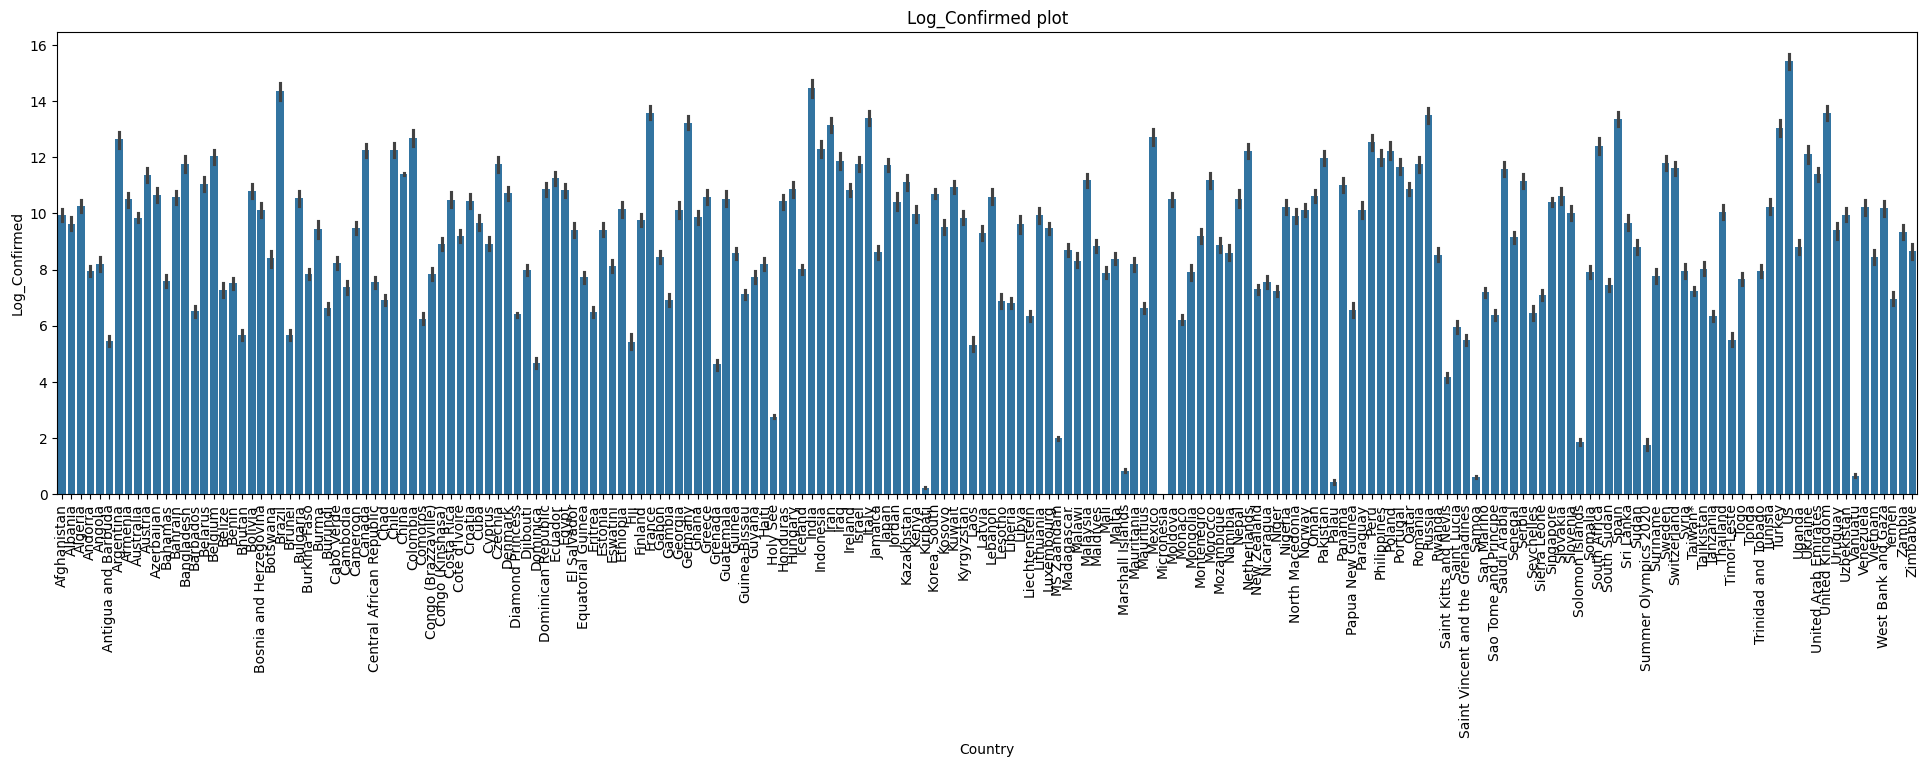

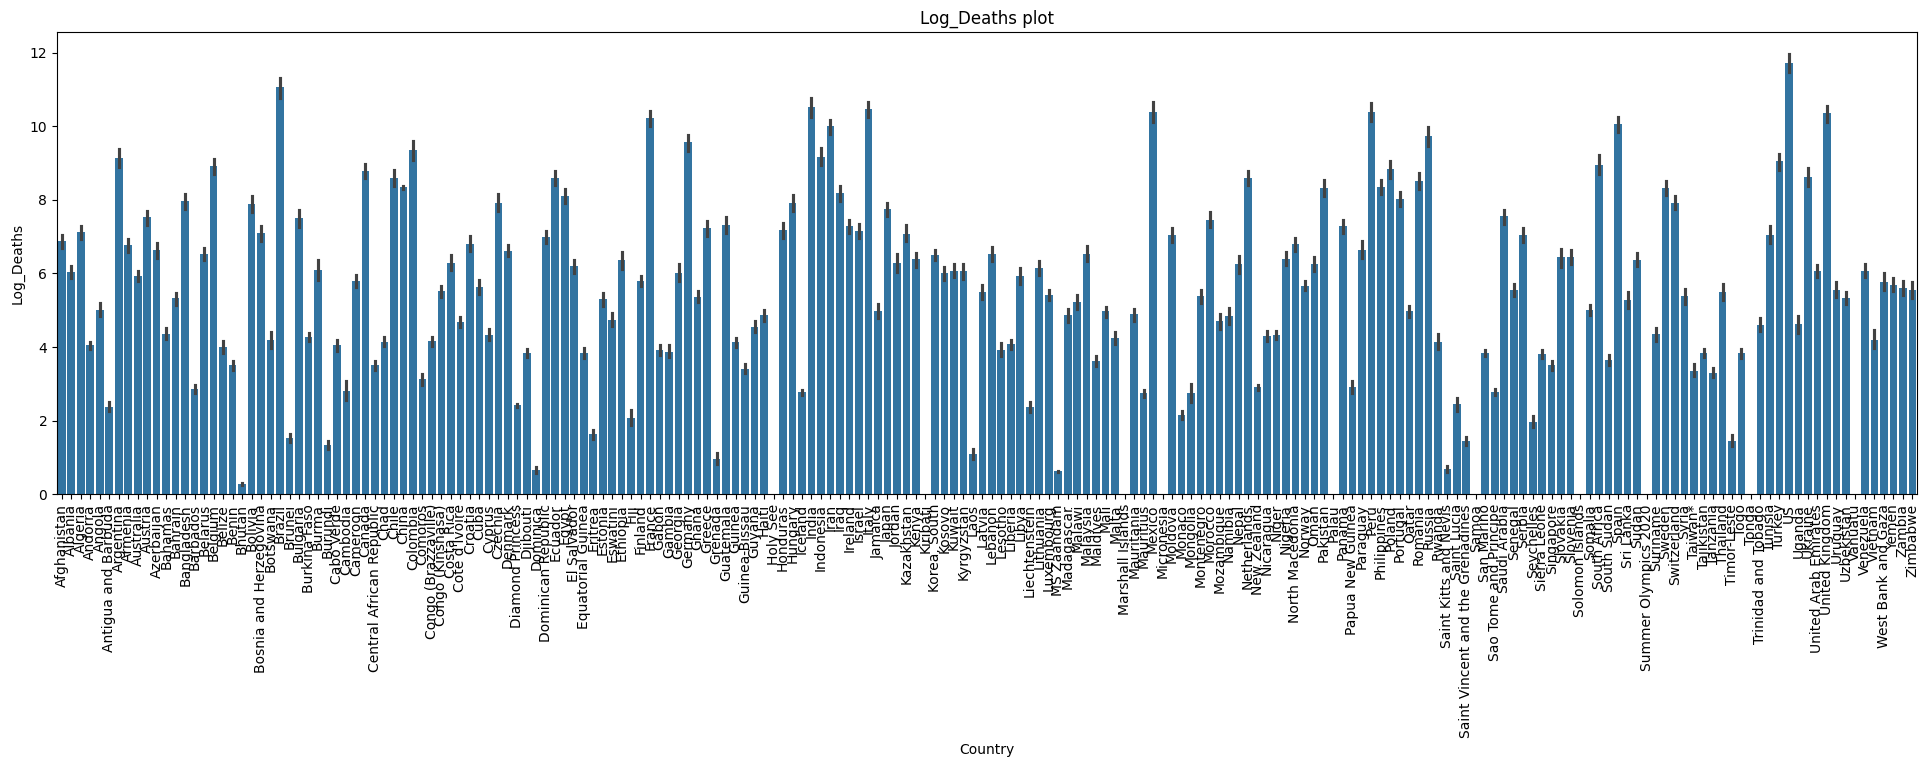

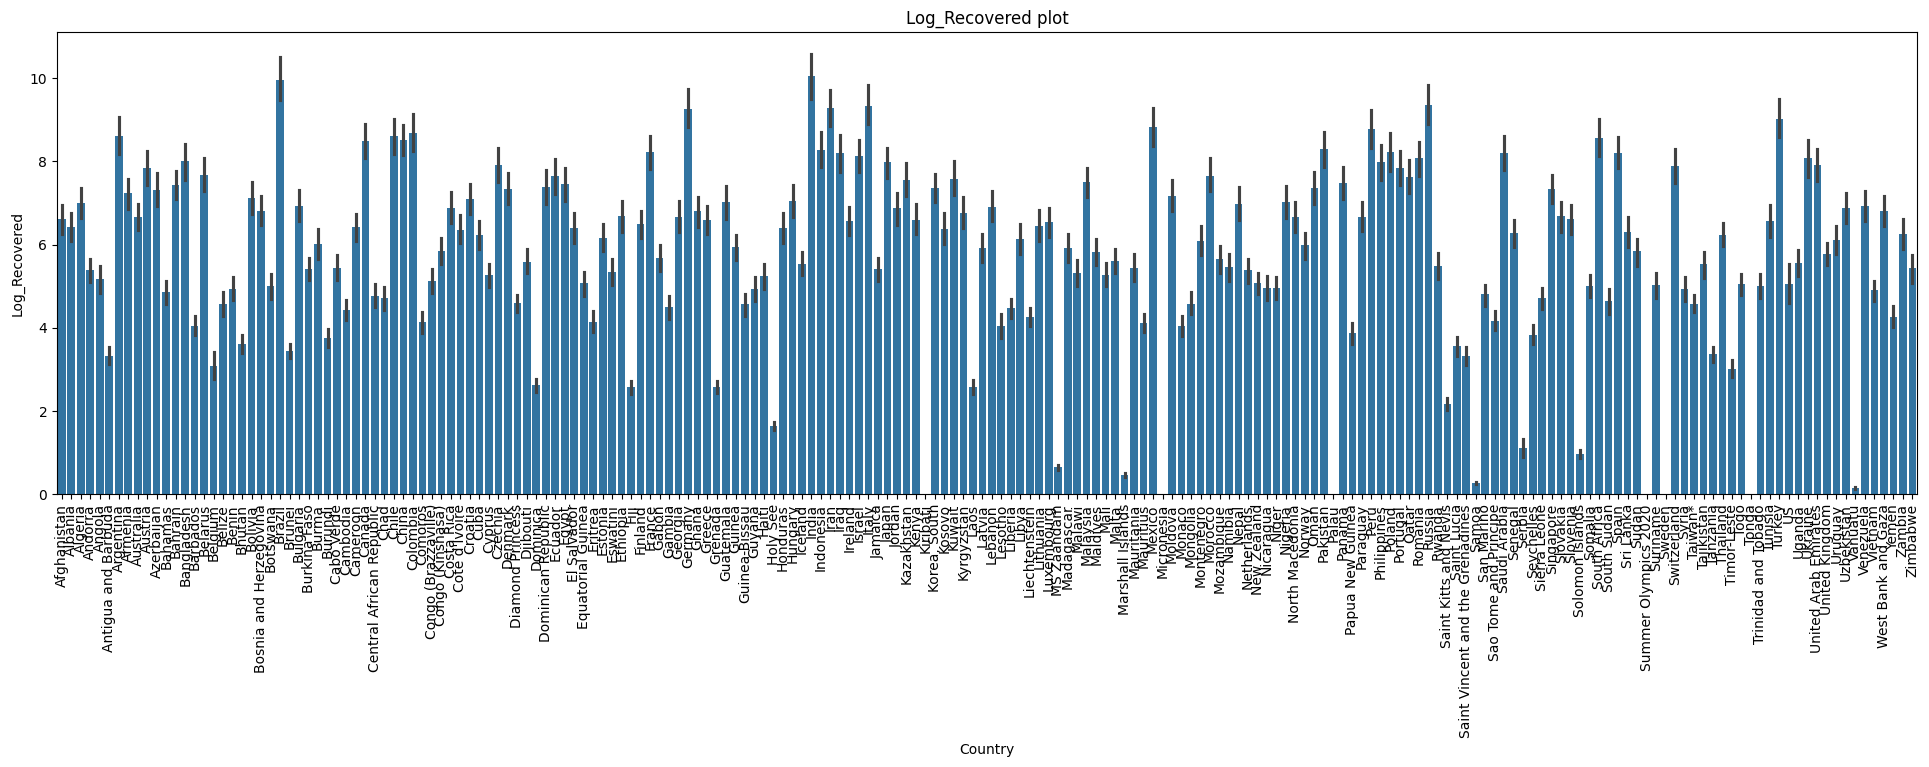

In [169]:
plot_feature('Country', 'Log_Confirmed', mod_data)
plot_feature('Country', 'Log_Deaths', mod_data)
plot_feature('Country', 'Log_Recovered', mod_data)


There seems to be some new outliers (Samoa, MS Zaandam, Marshall Islands etc.) in the data, so we can probably get new information to help with the classification task.

Let's see next how ratios behave under log function.

In [174]:
mod_data = add_log_feature(mod_data, 'Death_Ratio')
mod_data = add_log_feature(mod_data, 'Recovery_Ratio')
mod_data = add_log_feature(mod_data, 'Recovery_Death_Ratio')
mod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143668 entries, 0 to 143667
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Date                      143668 non-null  object 
 1   Country                   143668 non-null  object 
 2   Confirmed                 143668 non-null  int64  
 3   Recovered                 143668 non-null  int64  
 4   Deaths                    143668 non-null  int64  
 5   Year                      143668 non-null  int32  
 6   Death_Ratio               143668 non-null  float64
 7   Recovery_Ratio            143668 non-null  float64
 8   Recovery_Death_Ratio      143668 non-null  float64
 9   Log_Confirmed             143668 non-null  float64
 10  Log_Deaths                143668 non-null  float64
 11  Log_Recovered             143668 non-null  float64
 12  Log_Death_Ratio           143668 non-null  float64
 13  Log_Recovery_Ratio        143668 non-null  f

c:\Users\sami_\AppData\Local\Programs\Python\Python310\.venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\sami_\AppData\Local\Programs\Python\Python310\.venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\sami_\AppData\Local\Programs\Python\Python310\.venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


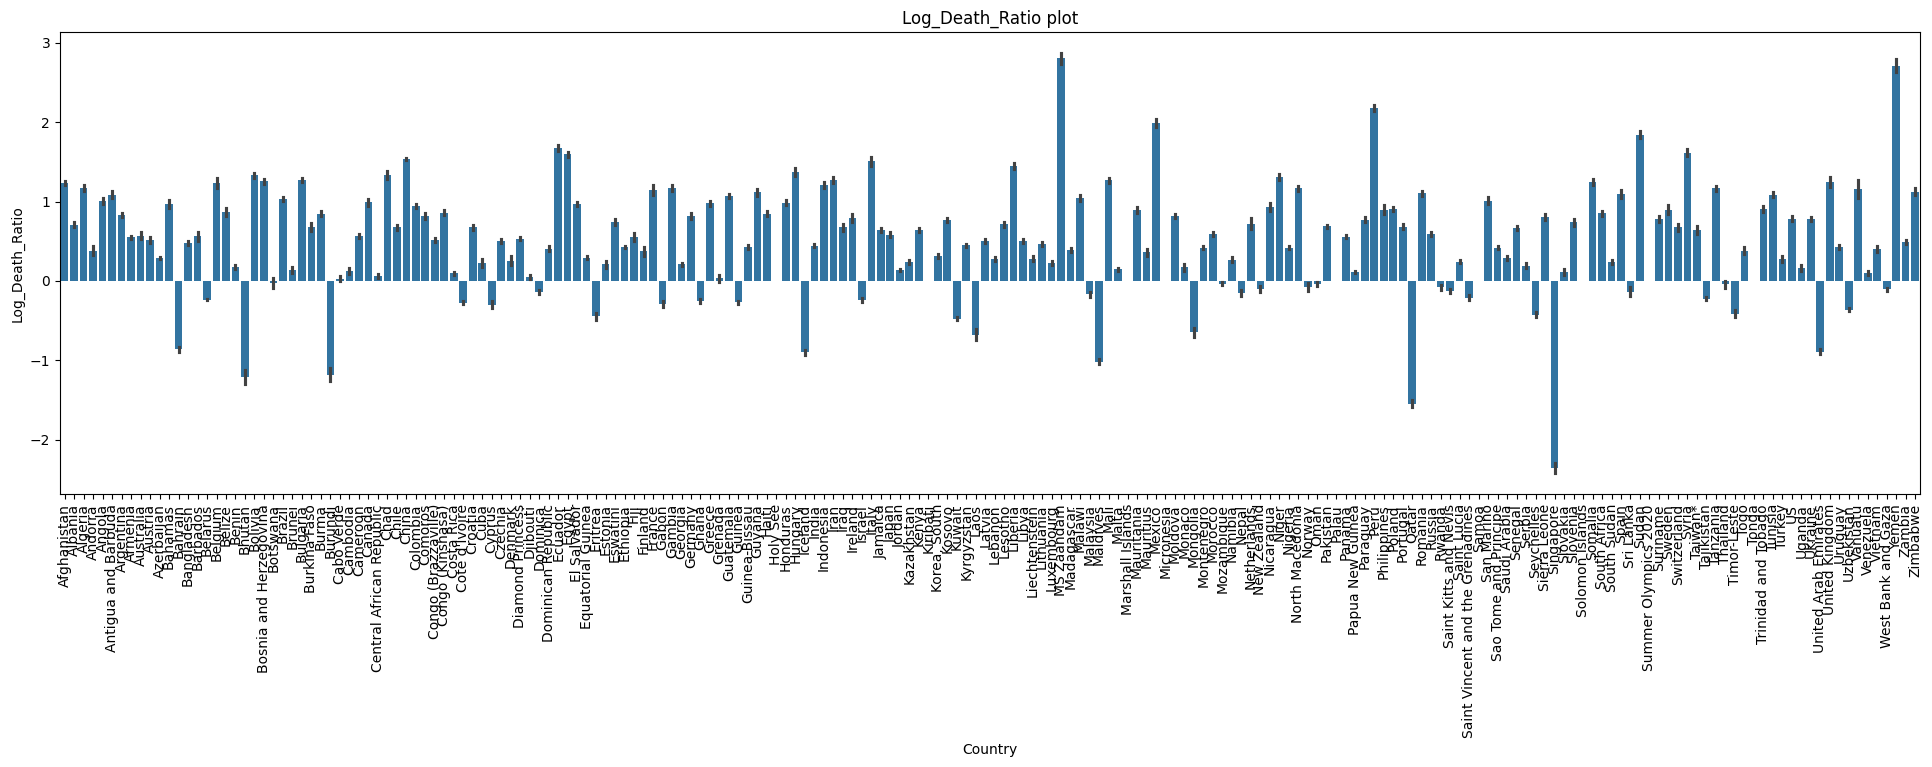

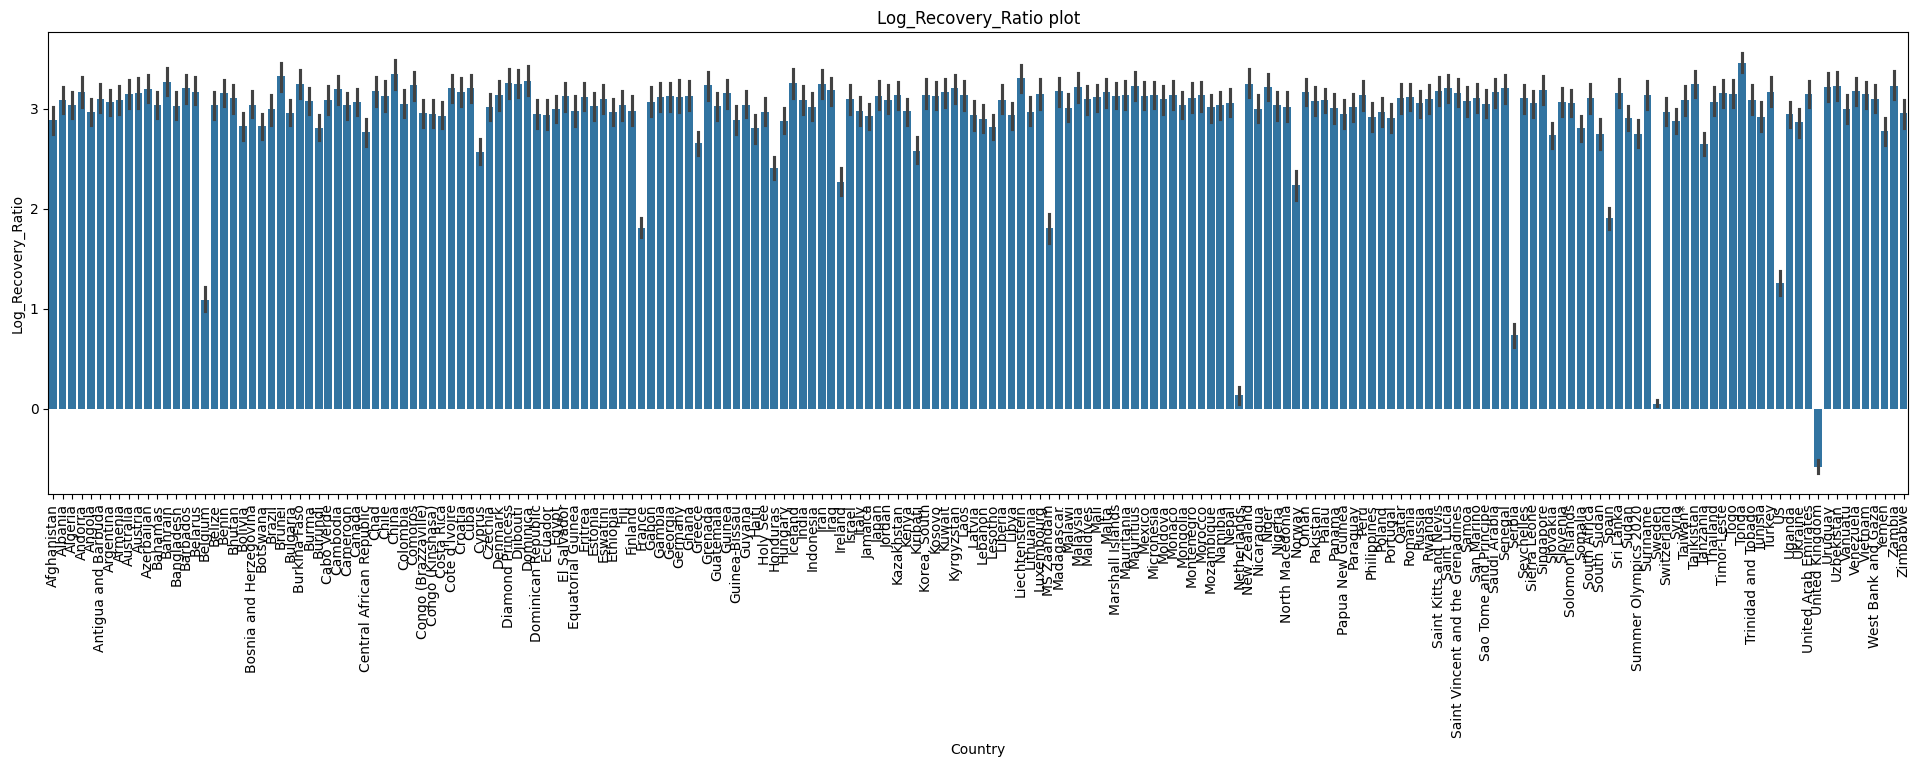

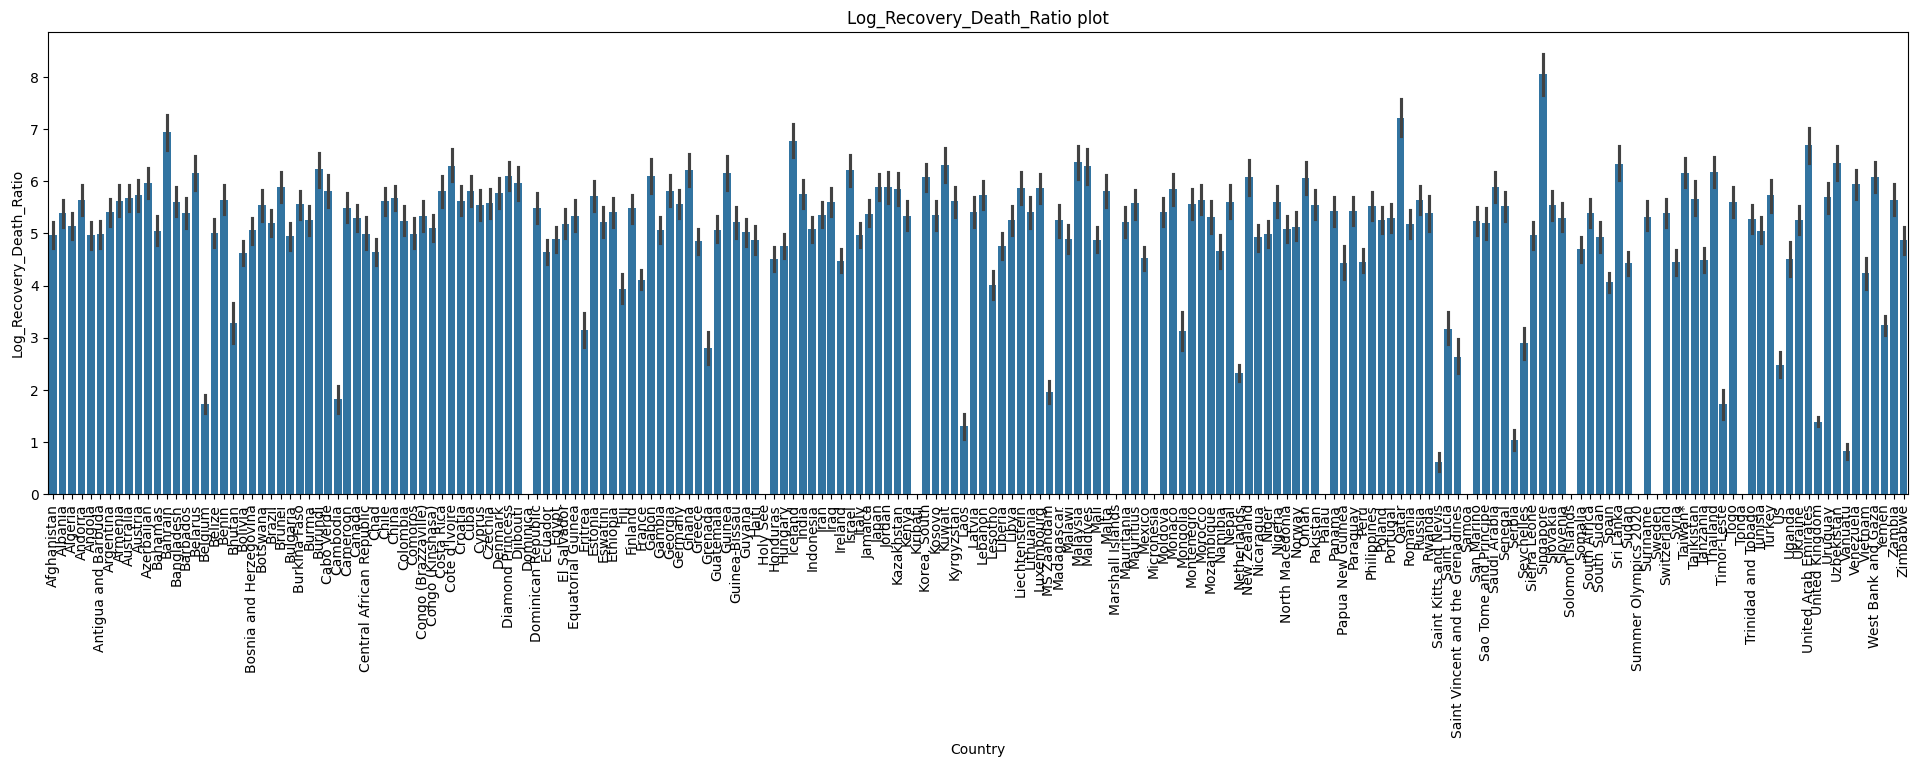

In [168]:
plot_feature('Country', 'Log_Death_Ratio', mod_data)
plot_feature('Country', 'Log_Recovery_Ratio', mod_data)
plot_feature('Country', 'Log_Recovery_Death_Ratio', mod_data)

**Log Death Ratio** seems to give the most new information and the other two don't seem to give anything new information, so adding the **Log Death Ratio** to the dataset is probably going to help with the classification task.

Let's try next if we could add some polynomial features to the dataset and then reduce the amount of noisy features with  **PCA (Principal Component Analysis)**.

In [175]:
mod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143668 entries, 0 to 143667
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Date                      143668 non-null  object 
 1   Country                   143668 non-null  object 
 2   Confirmed                 143668 non-null  int64  
 3   Recovered                 143668 non-null  int64  
 4   Deaths                    143668 non-null  int64  
 5   Year                      143668 non-null  int32  
 6   Death_Ratio               143668 non-null  float64
 7   Recovery_Ratio            143668 non-null  float64
 8   Recovery_Death_Ratio      143668 non-null  float64
 9   Log_Confirmed             143668 non-null  float64
 10  Log_Deaths                143668 non-null  float64
 11  Log_Recovered             143668 non-null  float64
 12  Log_Death_Ratio           143668 non-null  float64
 13  Log_Recovery_Ratio        143668 non-null  f

In [180]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Copying the data with new features.
pca_data = mod_data.copy()

features = ['Confirmed', 'Recovered', 'Deaths', 'Death_Ratio', 'Recovery_Ratio', 'Recovery_Death_Ratio',
            'Log_Confirmed', 'Log_Deaths', 'Log_Recovered', 'Log_Death_Ratio', 'Log_Recovery_Ratio',
            'Log_Recovery_Death_Ratio'
            ]
X = pca_data[features].copy()
print(f'The dimensionality of the features before transformation: {X.shape}\n')

# Polynomial transformation
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
print(f'The dimensionality of the features after Polynomial transformation: {X_poly.shape}\n')

# Scaling the data for PCA.
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Performing the PCA on the modified data.
transformer = PCA(n_components=50)
X_transformed = transformer.fit_transform(X_poly_scaled)
print(f'The dimensionality of the features after PCA transformation: {X_transformed.shape}')

The dimensionality of the features before transformation: (143668, 12)

The dimensionality of the features after transformation: (143668, 91)

The dimensionality of the features after transformation: (143668, 50)


## Change log

| Date | Version | Change Description |
| --- | --- | --- |
| 29.5.2024 | 1.0.1 | Data manipulated and added plots. Added more visuals for the confirmed, recovered and deaths analyses |
| 4.8.2024 | 1.0.2 | Added polynomial features and principal component analysis|
